In [1]:
#%% Imports.
import numpy as np
import matplotlib
%matplotlib inline
#%matplotlib notebook
import ardent

/home/dtward/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
#%% Load template and target.
# specify path
atlas_image_filename = '/home/dtward/Documents/cis/ardent-work/neuronex2/datasets/Adt27-55_02_Adt27-55_02_MNI.img'
target_image_filename = '/home/dtward/Documents/cis/ardent-work/neuronex2/datasets/Adt27-55_03_Adt27-55_03_MNI.img'
target_image_filename = '/home/dtward/Documents/cis/ardent-work/neuronex2/datasets/mri_for_demo.img'

# load
atlas = ardent.io.load(atlas_image_filename, down=[4,4,4], norm='sad', pad=1)
target = ardent.io.load(target_image_filename, down=[4,4,4], norm='sad')

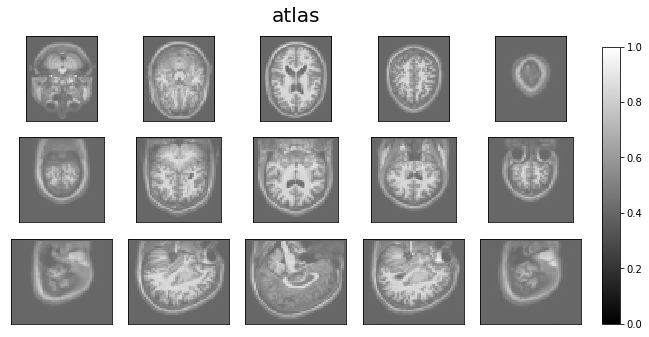

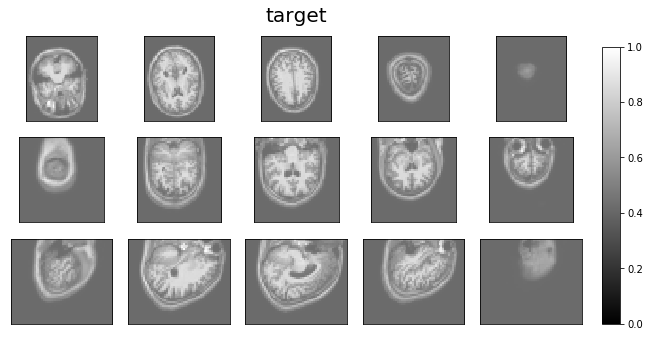

In [3]:
#%% Visualize images before registration, check orientation
ardent.heatslices(atlas, title='atlas', limit_mode='stdev')
ardent.heatslices(target, title='target', limit_mode='stdev')

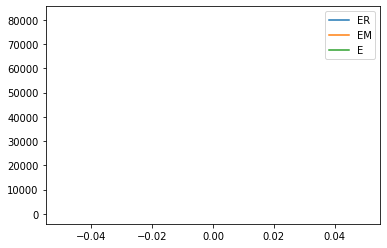

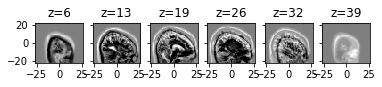

Completed iteration 0, E=81477.27068422764, EM=81477.27068422764, ER=0.0
Completed iteration 1, E=77825.50870185178, EM=77825.50870185178, ER=0.0
Completed iteration 2, E=74707.56807636349, EM=74707.56807636349, ER=0.0
Completed iteration 3, E=72175.97175621663, EM=72175.97175621663, ER=0.0
Completed iteration 4, E=70268.04145663796, EM=70268.04145663796, ER=0.0


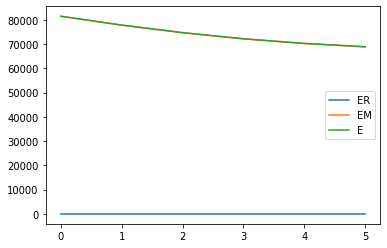

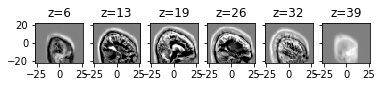

Completed iteration 5, E=68886.83820876147, EM=68886.83820876147, ER=0.0
Completed iteration 6, E=67352.5092867449, EM=67352.5092867449, ER=0.0
Completed iteration 7, E=65929.46869651537, EM=65929.46869651537, ER=0.0
Completed iteration 8, E=64613.735376626224, EM=64613.735376626224, ER=0.0
Completed iteration 9, E=63281.643585435, EM=63281.643585435, ER=0.0


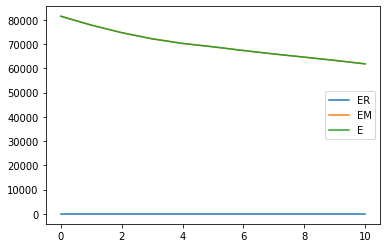

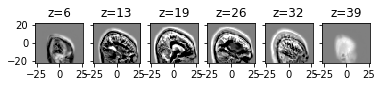

Completed iteration 10, E=61852.88804950302, EM=61852.88804950302, ER=0.0
Completed iteration 11, E=60184.954770895536, EM=60184.954770895536, ER=0.0
Completed iteration 12, E=58430.101122139225, EM=58430.101122139225, ER=0.0
Completed iteration 13, E=56700.37543059208, EM=56700.37543059208, ER=0.0
Completed iteration 14, E=54913.54510266906, EM=54913.54510266906, ER=0.0


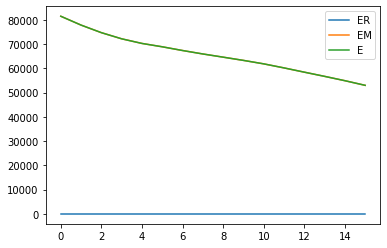

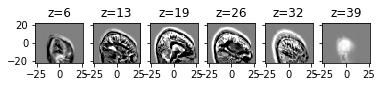

Completed iteration 15, E=52999.96162019874, EM=52999.96162019874, ER=0.0
Completed iteration 16, E=50828.582183792394, EM=50828.582183792394, ER=0.0
Completed iteration 17, E=48489.66740879567, EM=48489.66740879567, ER=0.0
Completed iteration 18, E=46066.98560027525, EM=46066.98560027525, ER=0.0
Completed iteration 19, E=43654.805409184555, EM=43654.805409184555, ER=0.0


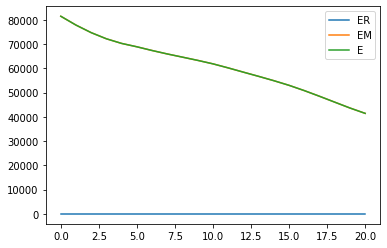

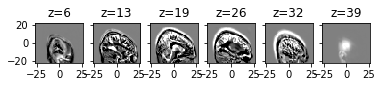

Completed iteration 20, E=41447.32524738462, EM=41447.32524738462, ER=0.0
Completed iteration 21, E=39483.914123283714, EM=39483.914123283714, ER=0.0
Completed iteration 22, E=37774.65679121935, EM=37774.65679121935, ER=0.0
Completed iteration 23, E=36256.19487920994, EM=36256.19487920994, ER=0.0
Completed iteration 24, E=34833.55998497331, EM=34833.55998497331, ER=0.0


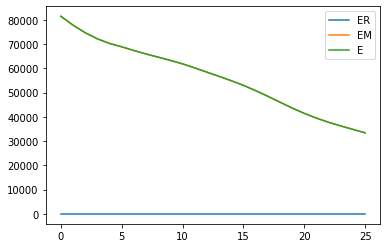

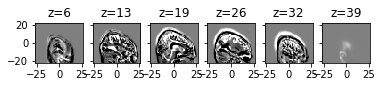

Completed iteration 25, E=33410.20537710111, EM=33410.20537710111, ER=0.0
Completed iteration 26, E=31918.05294173898, EM=31918.05294173898, ER=0.0
Completed iteration 27, E=30344.532704884692, EM=30344.532704884692, ER=0.0
Completed iteration 28, E=28654.4527847872, EM=28654.4527847872, ER=0.0
Completed iteration 29, E=26882.43455176164, EM=26882.43455176164, ER=0.0


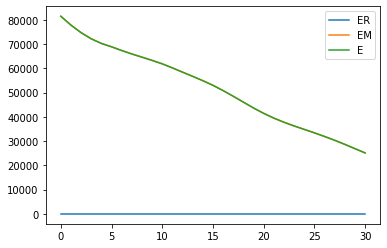

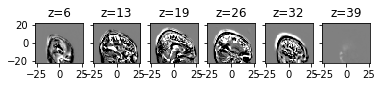

Completed iteration 30, E=25133.85709081806, EM=25133.85709081806, ER=0.0
Completed iteration 31, E=23433.28344765591, EM=23433.28344765591, ER=0.0
Completed iteration 32, E=21862.342757968738, EM=21862.342757968738, ER=0.0
Completed iteration 33, E=20513.200231923027, EM=20513.200231923027, ER=0.0
Completed iteration 34, E=19377.826689313537, EM=19377.826689313537, ER=0.0


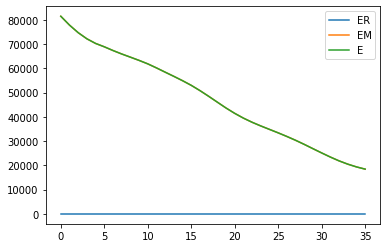

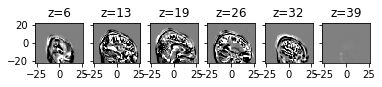

Completed iteration 35, E=18458.191899073998, EM=18458.191899073998, ER=0.0
Completed iteration 36, E=17736.71505870118, EM=17736.71505870118, ER=0.0
Completed iteration 37, E=17187.074435225306, EM=17187.074435225306, ER=0.0
Completed iteration 38, E=16772.4344253822, EM=16772.4344253822, ER=0.0
Completed iteration 39, E=16456.941569830884, EM=16456.941569830884, ER=0.0


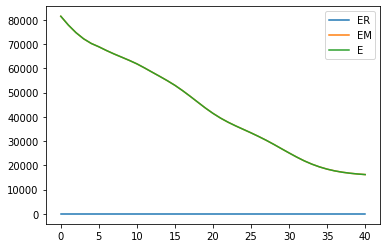

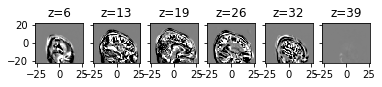

Completed iteration 40, E=16216.16645103595, EM=16216.16645103595, ER=0.0
Completed iteration 41, E=16032.651065134705, EM=16032.651065134705, ER=0.0
Completed iteration 42, E=15892.752700482793, EM=15892.752700482793, ER=0.0
Completed iteration 43, E=15783.772873133905, EM=15783.772873133905, ER=0.0
Completed iteration 44, E=15695.941291426778, EM=15695.941291426778, ER=0.0


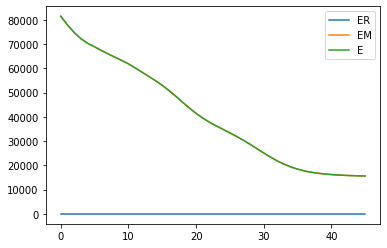

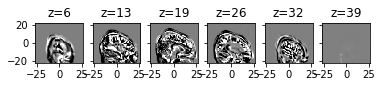

Completed iteration 45, E=15622.738007633892, EM=15622.738007633892, ER=0.0
Completed iteration 46, E=15560.313683232675, EM=15560.313683232675, ER=0.0
Completed iteration 47, E=15507.81491464048, EM=15507.81491464048, ER=0.0
Completed iteration 48, E=15463.030847121732, EM=15463.030847121732, ER=0.0
Completed iteration 49, E=15424.33382076064, EM=15424.33382076064, ER=0.0


In [4]:
#%% Perform registration.
transform = ardent.Transform()
transform.register(template=atlas, target=target, 
                   sigmaM=1.0,sigmaR=2e1, 
                   eV=3e0*0, eT=2e-5, eL=1e-7, 
                   niter=50, draw=True)

In [5]:
#%% Apply the transformation.
resampled_atlas = transform.apply_transform(subject=atlas, deform_to='target-identity', save_path=None)
deformed_atlas = transform.apply_transform(subject=atlas, deform_to='target', save_path=None)
deformed_target = transform.apply_transform(subject=target, deform_to='template', save_path=None)

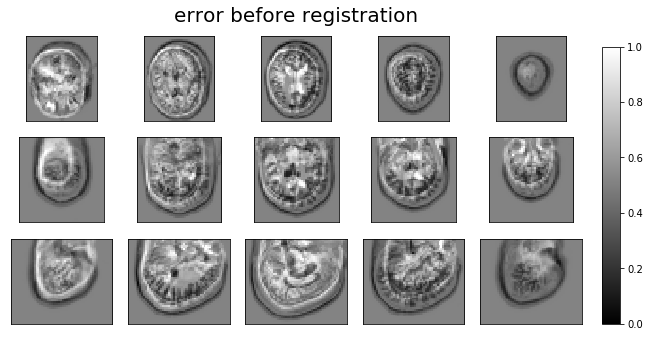

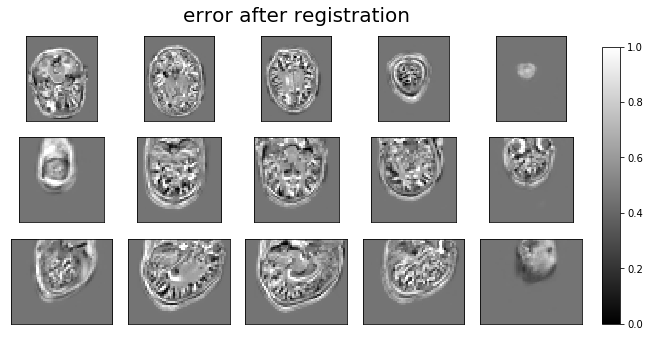

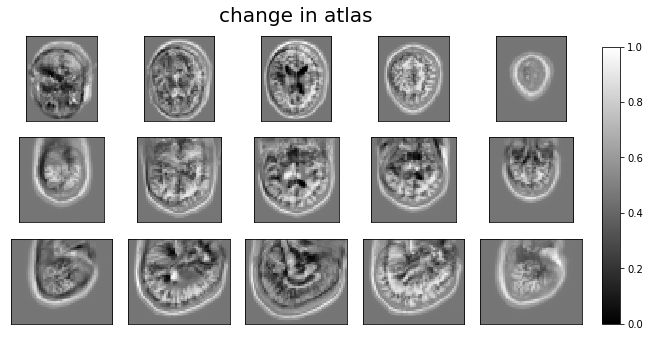

In [6]:
#%% Visualize results.
# To simply visualize error we plot the difference between images.
ardent.heatslices(target - resampled_atlas, title='error before registration', limit_mode='stdev')
ardent.heatslices(target - deformed_atlas, title='error after registration', limit_mode='stdev')
ardent.heatslices(resampled_atlas - deformed_atlas, title='change in atlas', limit_mode='stdev')

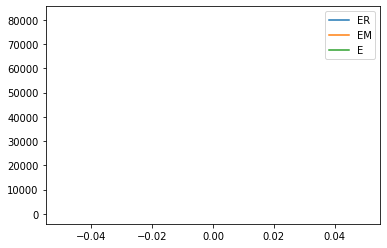

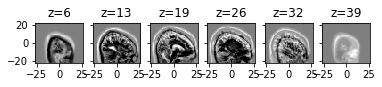

Completed iteration 0, E=81477.27068422764, EM=81477.27068422764, ER=0.0
Completed iteration 1, E=75516.58769807531, EM=75514.55987122751, ER=2.0278268478063355
Completed iteration 2, E=70774.32640045384, EM=70766.0139239908, ER=8.312476463030103
Completed iteration 3, E=67381.17200042368, EM=67362.42729818406, ER=18.74470223962124
Completed iteration 4, E=64617.36019954841, EM=64584.370645323834, ER=32.98955422457882


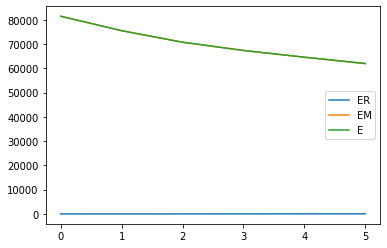

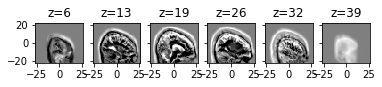

Completed iteration 5, E=62003.89044599233, EM=61953.24486501125, ER=50.645580981078076
Completed iteration 6, E=59488.70328097549, EM=59417.383246203346, ER=71.32003477214586
Completed iteration 7, E=56599.08209963537, EM=56504.12817797125, ER=94.95392166411759
Completed iteration 8, E=53741.524972917716, EM=53620.1963971299, ER=121.32857578781999
Completed iteration 9, E=51120.719491622425, EM=50971.051156621674, ER=149.66833500074978


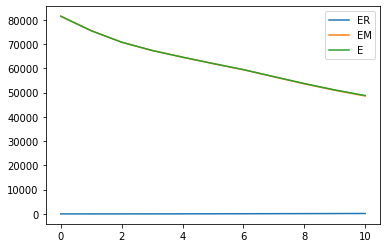

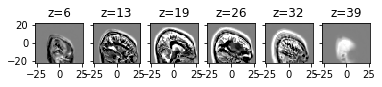

Completed iteration 10, E=48797.07087506391, EM=48618.20351114137, ER=178.8673639225407
Completed iteration 11, E=46873.26818924572, EM=46665.529489969085, ER=207.73869927662966
Completed iteration 12, E=45011.63139017187, EM=44775.77666178065, ER=235.85472839121599
Completed iteration 13, E=43091.128485932466, EM=42828.01813621732, ER=263.11034971514846
Completed iteration 14, E=41280.22799014578, EM=40990.70785375592, ER=289.52013638985875


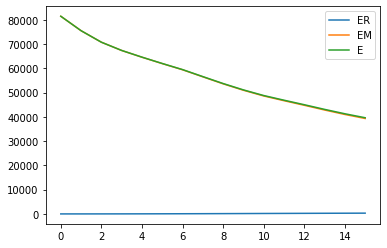

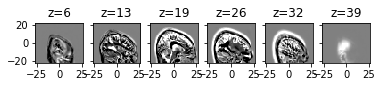

Completed iteration 15, E=39647.28586745526, EM=39332.19188346651, ER=315.0939839887533
Completed iteration 16, E=38122.80425066766, EM=37782.83943464061, ER=339.96481602704586
Completed iteration 17, E=36551.22725999018, EM=36186.84282548799, ER=364.38443450218614
Completed iteration 18, E=34643.85254654743, EM=34255.102599650876, ER=388.74994689655404
Completed iteration 19, E=32401.826980020618, EM=31988.550485214764, ER=413.27649480585427


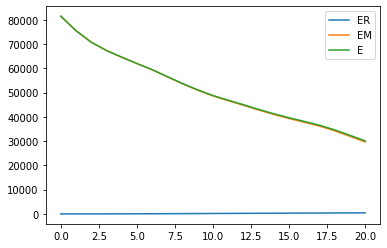

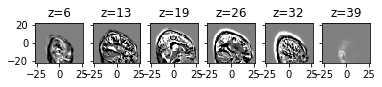

Completed iteration 20, E=30098.633579897956, EM=29660.63202626435, ER=438.0015536336054
Completed iteration 21, E=27887.462670388475, EM=27424.595026134943, ER=462.8676442535307
Completed iteration 22, E=25711.42070750563, EM=25223.69206975537, ER=487.7286377502618
Completed iteration 23, E=23539.677336375495, EM=23027.757298663226, ER=511.9200377122703
Completed iteration 24, E=21596.394167090715, EM=21061.969839549667, ER=534.4243275410498


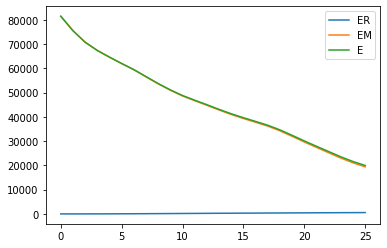

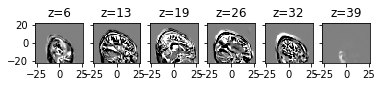

Completed iteration 25, E=19960.248138341078, EM=19405.734109506822, ER=554.5140288342573
Completed iteration 26, E=18591.55370234139, EM=18019.638965349008, ER=571.914736992382
Completed iteration 27, E=17405.60920334185, EM=16818.843280048342, ER=586.765923293509
Completed iteration 28, E=16409.956034761122, EM=15810.84534102348, ER=599.1106937376429
Completed iteration 29, E=15612.897200656887, EM=15003.764902998912, ER=609.1322976579755


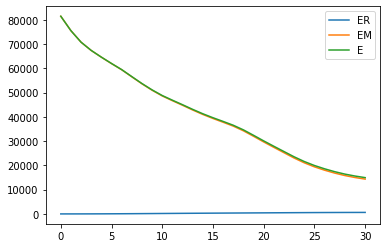

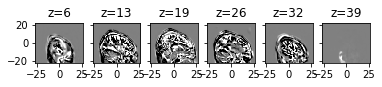

Completed iteration 30, E=14959.15441680271, EM=14342.029268043145, ER=617.125148759565
Completed iteration 31, E=14435.729507957214, EM=13812.31042074978, ER=623.4190872074337
Completed iteration 32, E=14024.29194408987, EM=13395.885160278007, ER=628.4067838118634
Completed iteration 33, E=13700.779799598005, EM=13068.352230995024, ER=632.4275686029819
Completed iteration 34, E=13442.245811623787, EM=12806.48412784623, ER=635.7616837775571


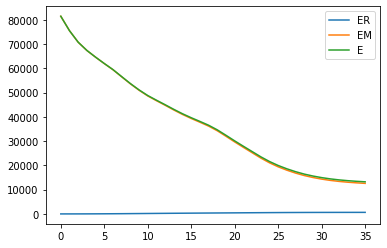

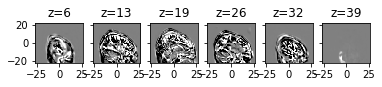

Completed iteration 35, E=13228.326328903911, EM=12589.658972490202, ER=638.6673564137088
Completed iteration 36, E=13046.353059581543, EM=12405.035108705171, ER=641.3179508763716
Completed iteration 37, E=12888.269355516572, EM=12244.43006115992, ER=643.8392943566525
Completed iteration 38, E=12750.521531534723, EM=12104.22069986213, ER=646.3008316725935
Completed iteration 39, E=12627.63723173611, EM=11978.893953612194, ER=648.743278123914


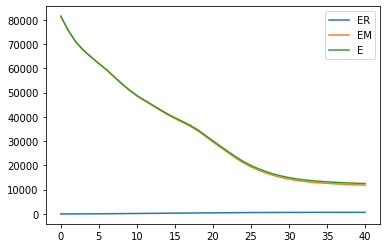

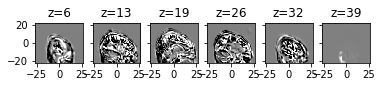

Completed iteration 40, E=12516.68534993791, EM=11865.49133046112, ER=651.1940194767899
Completed iteration 41, E=12414.602936680789, EM=11760.930933569516, ER=653.6720031112726
Completed iteration 42, E=12320.937877114937, EM=11664.74689790945, ER=656.1909792054868
Completed iteration 43, E=12235.003645924011, EM=11576.242714921118, ER=658.7609310028921
Completed iteration 44, E=12154.986787923093, EM=11493.599596306423, ER=661.3871916166694


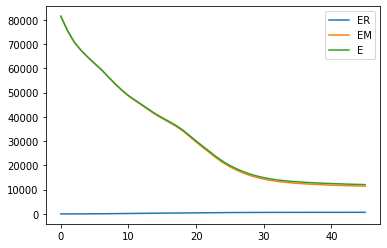

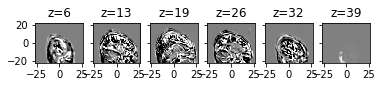

Completed iteration 45, E=12080.200505357736, EM=11416.12260847203, ER=664.0778968857064
Completed iteration 46, E=12010.28509634603, EM=11343.447885402078, ER=666.8372109439517
Completed iteration 47, E=11943.171845980813, EM=11273.507128685666, ER=669.6647172951467
Completed iteration 48, E=11878.894628104412, EM=11206.335062401206, ER=672.5595657032072
Completed iteration 49, E=11817.971632029541, EM=11142.449948559728, ER=675.521683469814


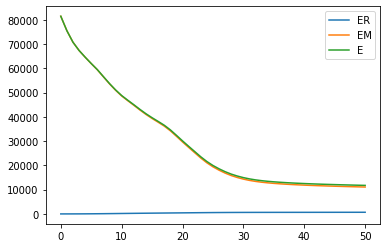

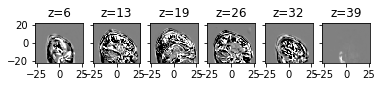

Completed iteration 50, E=11759.841679092324, EM=11081.29313068204, ER=678.5485484102852
Completed iteration 51, E=11704.55548747727, EM=11022.917000503412, ER=681.6384869738575
Completed iteration 52, E=11652.119448082429, EM=10967.329681943544, ER=684.789766138885
Completed iteration 53, E=11601.650688271473, EM=10913.650668920514, ER=688.0000193509588
Completed iteration 54, E=11553.426572773435, EM=10862.157716465797, ER=691.2688563076381


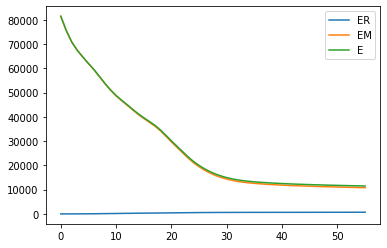

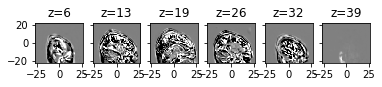

Completed iteration 55, E=11507.381678620626, EM=10812.785909619217, ER=694.5957690014086
Completed iteration 56, E=11463.252266059742, EM=10765.271780653995, ER=697.9804854057476
Completed iteration 57, E=11420.844965812088, EM=10719.42476517773, ER=701.4202006343579
Completed iteration 58, E=11380.703183935108, EM=10675.791075532863, ER=704.9121084022438
Completed iteration 59, E=11342.433525783064, EM=10633.979674852377, ER=708.4538509306881


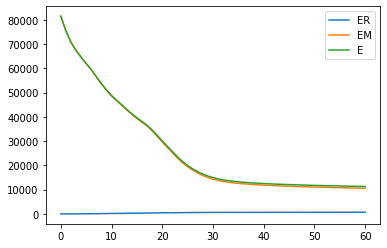

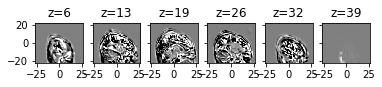

Completed iteration 60, E=11305.641085617543, EM=10593.59852902077, ER=712.0425565967734
Completed iteration 61, E=11270.58431173291, EM=10554.907436887852, ER=715.6768748450585
Completed iteration 62, E=11236.536175444173, EM=10517.17999302535, ER=719.3561824188236
Completed iteration 63, E=11203.555580109822, EM=10480.47628217335, ER=723.0792979364732
Completed iteration 64, E=11172.03700710016, EM=10445.19272513036, ER=726.8442819698002


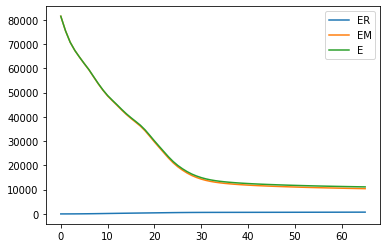

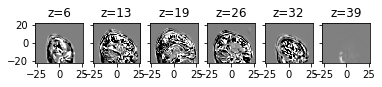

Completed iteration 65, E=11141.762577976075, EM=10411.112825622036, ER=730.6497523540382
Completed iteration 66, E=11112.336344136986, EM=10377.84138165474, ER=734.4949624822461
Completed iteration 67, E=11084.040799260156, EM=10345.66279717986, ER=738.3780020802951
Completed iteration 68, E=11056.581415273924, EM=10314.283043765263, ER=742.2983715086606
Completed iteration 69, E=11030.274449770579, EM=10284.019531872247, ER=746.2549178983319


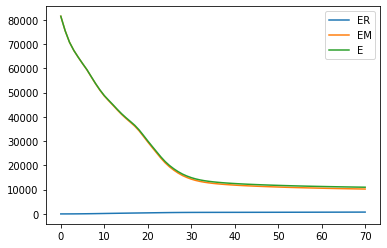

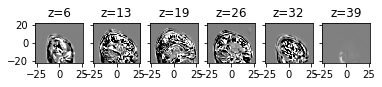

Completed iteration 70, E=11004.90488166609, EM=10254.65881366868, ER=750.2460679974107
Completed iteration 71, E=10980.465499644659, EM=10226.194197012948, ER=754.2713026317113
Completed iteration 72, E=10956.82061874411, EM=10198.49048354526, ER=758.3301351988504
Completed iteration 73, E=10933.999756028381, EM=10171.578399418093, ER=762.4213566102876
Completed iteration 74, E=10911.823460695965, EM=10145.279622334652, ER=766.5438383613131


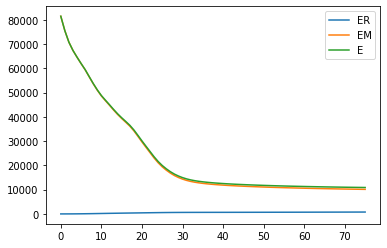

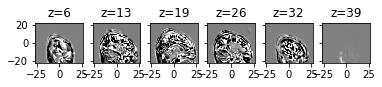

Completed iteration 75, E=10890.302825055736, EM=10119.605620047427, ER=770.6972050083098
Completed iteration 76, E=10869.444158021244, EM=10094.563154345291, ER=774.8810036759535
Completed iteration 77, E=10849.656988339762, EM=10070.562587095767, ER=779.0944012439957
Completed iteration 78, E=10830.623110297307, EM=10047.286048519876, ER=783.3370617774307
Completed iteration 79, E=10812.473609604229, EM=10024.865065729691, ER=787.6085438745378


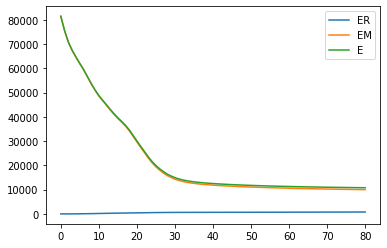

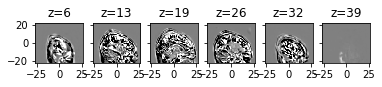

Completed iteration 80, E=10795.12779278367, EM=10003.219344925432, ER=791.9084478582383
Completed iteration 81, E=10778.385197357436, EM=9982.14886787694, ER=796.2363294804971
Completed iteration 82, E=10762.262611295082, EM=9961.671910852157, ER=800.590700442924
Completed iteration 83, E=10746.497284299123, EM=9941.525862997876, ER=804.9714213012463
Completed iteration 84, E=10731.007500166868, EM=9921.62943174261, ER=809.3780684242566


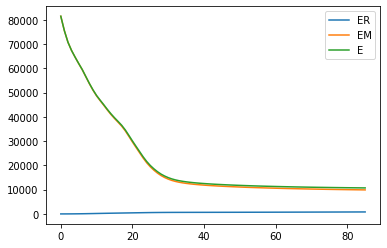

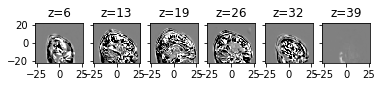

Completed iteration 85, E=10715.8716027667, EM=9902.061482827354, ER=813.8101199393458
Completed iteration 86, E=10701.079446565069, EM=9882.813289683532, ER=818.2661568815361
Completed iteration 87, E=10686.795655956275, EM=9864.050279659608, ER=822.7453762966664
Completed iteration 88, E=10673.027140075636, EM=9845.779694023202, ER=827.2474460524345
Completed iteration 89, E=10659.674299601686, EM=9827.901842495987, ER=831.7724571056988


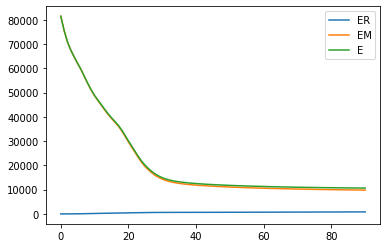

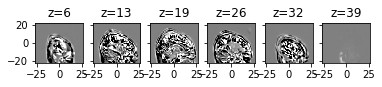

Completed iteration 90, E=10646.83359591899, EM=9810.513941965106, ER=836.3196539538836
Completed iteration 91, E=10634.429808540453, EM=9793.541876972573, ER=840.8879315678807
Completed iteration 92, E=10622.164849685625, EM=9776.687866342007, ER=845.4769833436186
Completed iteration 93, E=10610.14098412965, EM=9760.054158170653, ER=850.0868259589967
Completed iteration 94, E=10598.471846088447, EM=9743.75433226563, ER=854.7175138228176


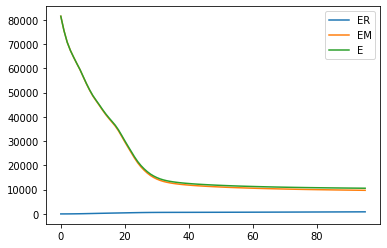

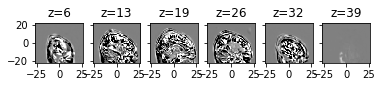

Completed iteration 95, E=10587.164881597535, EM=9727.795873418076, ER=859.3690081794591
Completed iteration 96, E=10576.345489961559, EM=9712.304173555549, ER=864.0413164060096
Completed iteration 97, E=10565.926514646508, EM=9697.192709061832, ER=868.7338055846759
Completed iteration 98, E=10555.740772843299, EM=9682.294080053902, ER=873.4466927893978
Completed iteration 99, E=10545.695092111484, EM=9667.515605873756, ER=878.179486237728


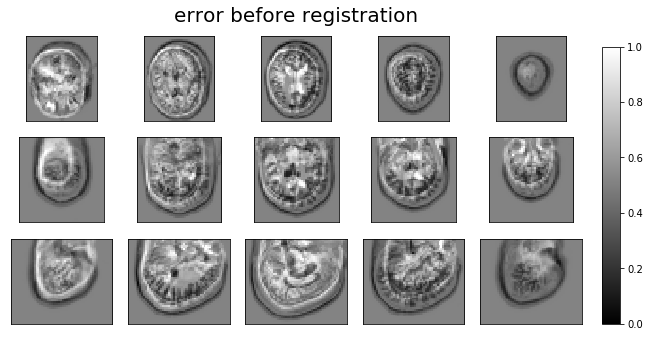

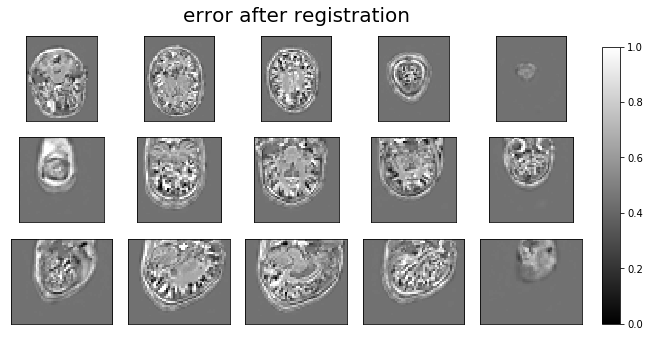

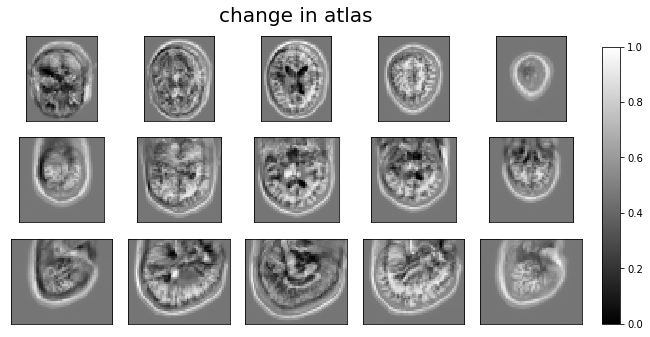

In [7]:
#%% Perform registration.
transform = ardent.Transform()
transform.register(template=atlas, target=target, 
                   sigmaM=1.0,sigmaR=2e1, 
                   eV=1e0, eT=2e-5, eL=1e-7, 
                   niter=100, draw=True)

#%% Apply the transformation.
resampled_atlas = transform.apply_transform(subject=atlas, deform_to='target-identity', save_path=None)
deformed_atlas = transform.apply_transform(subject=atlas, deform_to='target', save_path=None)
deformed_target = transform.apply_transform(subject=target, deform_to='template', save_path=None)

#%% Visualize results.
# To simply visualize error we plot the difference between images.
ardent.heatslices(target - resampled_atlas, title='error before registration', limit_mode='stdev')
ardent.heatslices(target - deformed_atlas, title='error after registration', limit_mode='stdev')
ardent.heatslices(resampled_atlas - deformed_atlas, title='change in atlas', limit_mode='stdev')